In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [8]:
#Importing library
import pandas as pd
import plotnine
from plotnine import *

In [2]:
df = pd.read_csv('/kaggle/input/iris-dataset/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

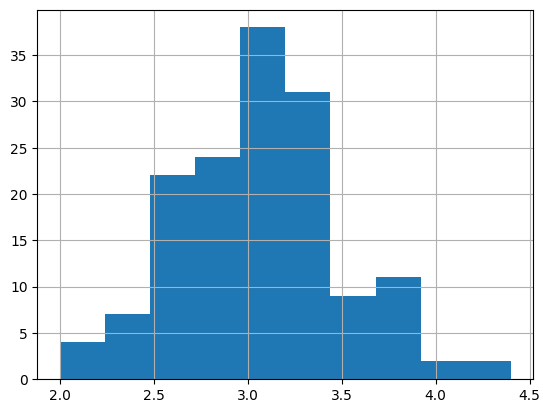

In [23]:
df["sepal_width"].hist()

<Axes: >

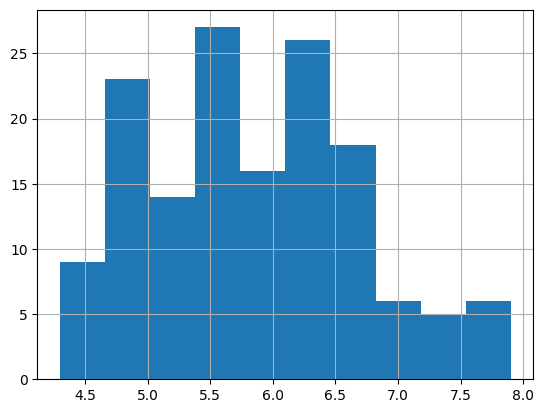

In [24]:
df["sepal_length"].hist()


<Axes: >

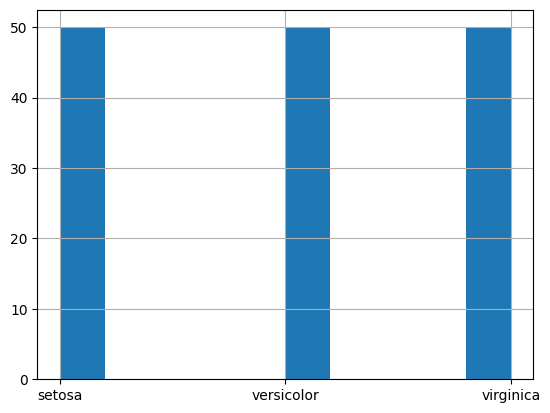

In [25]:
df["species"].hist()

In [5]:
sepal_length=df[["sepal_length","species"]]
sepal_length

,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


/tmp/ipykernel_33/1288401795.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


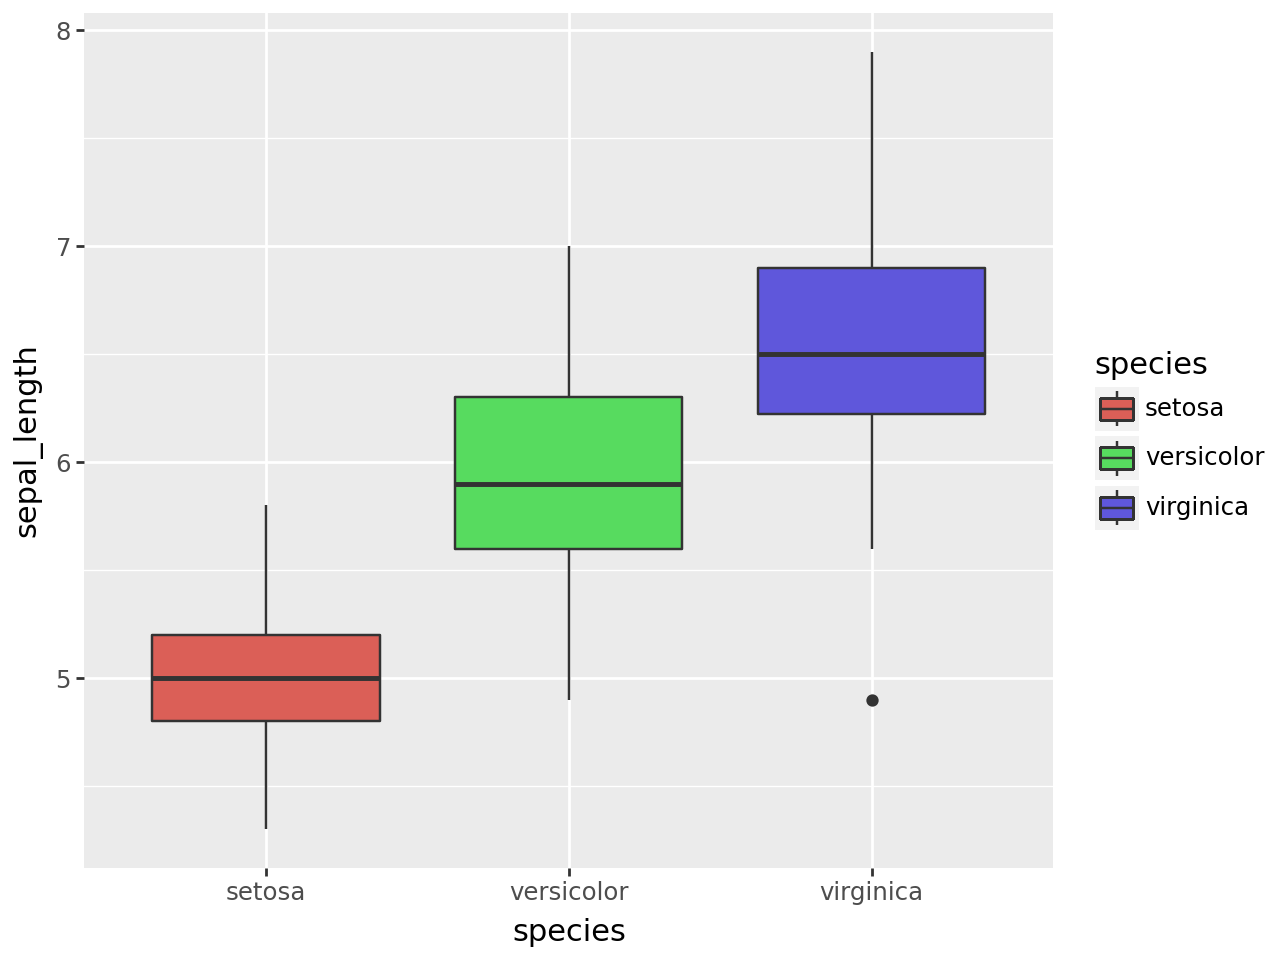

In [10]:
# Create a boxplot
graph1=(ggplot(sepal_length) + aes(x="species", y="sepal_length", fill="species")) + geom_boxplot()
print(graph1)

/tmp/ipykernel_33/3428423377.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


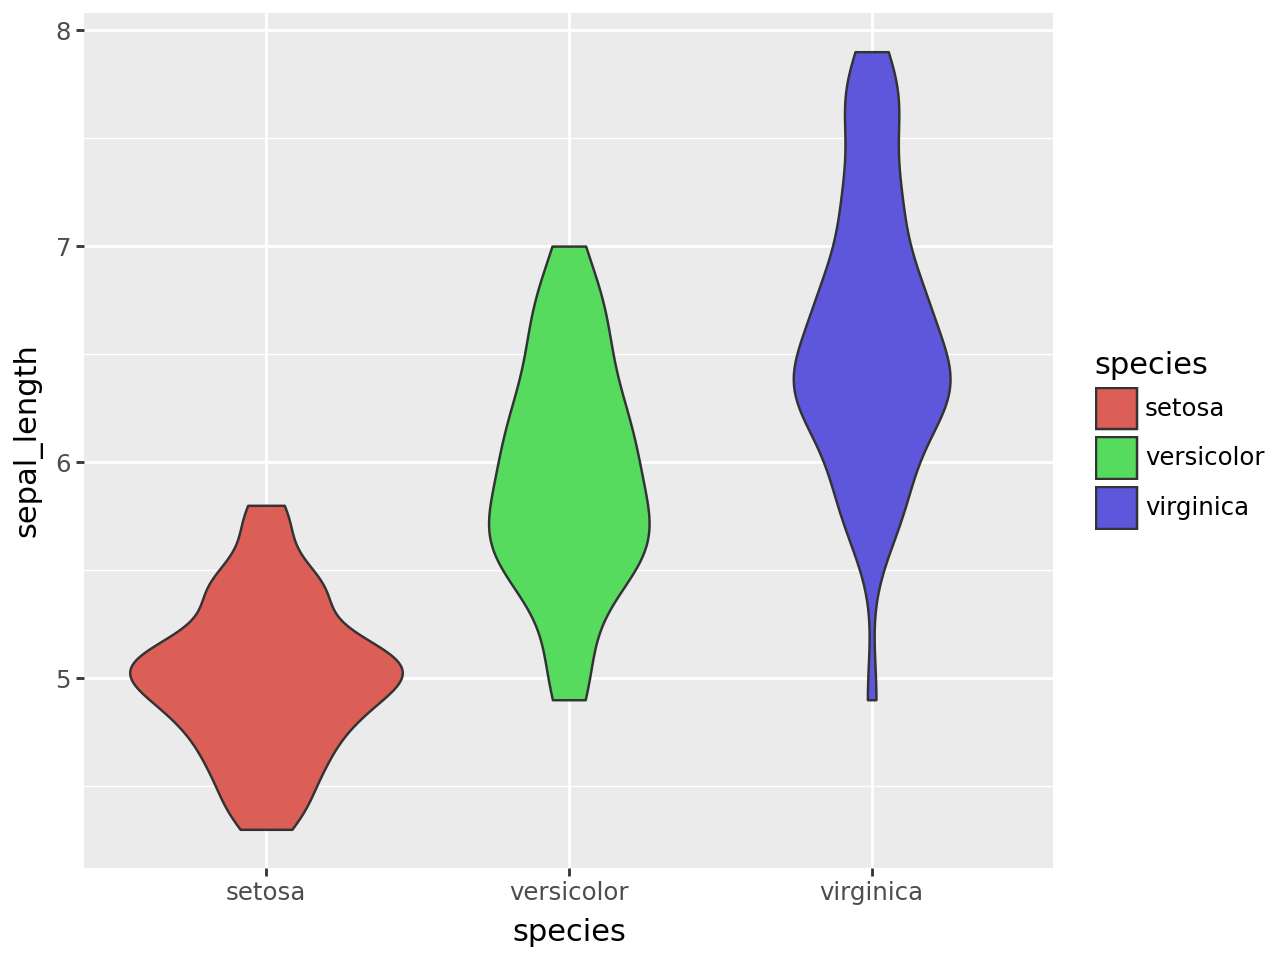

In [11]:
# Create a violinplot
graph2=(ggplot(sepal_length) + aes(x="species", y="sepal_length", fill="species")) + geom_violin()
print(graph2)

/tmp/ipykernel_33/2691655814.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


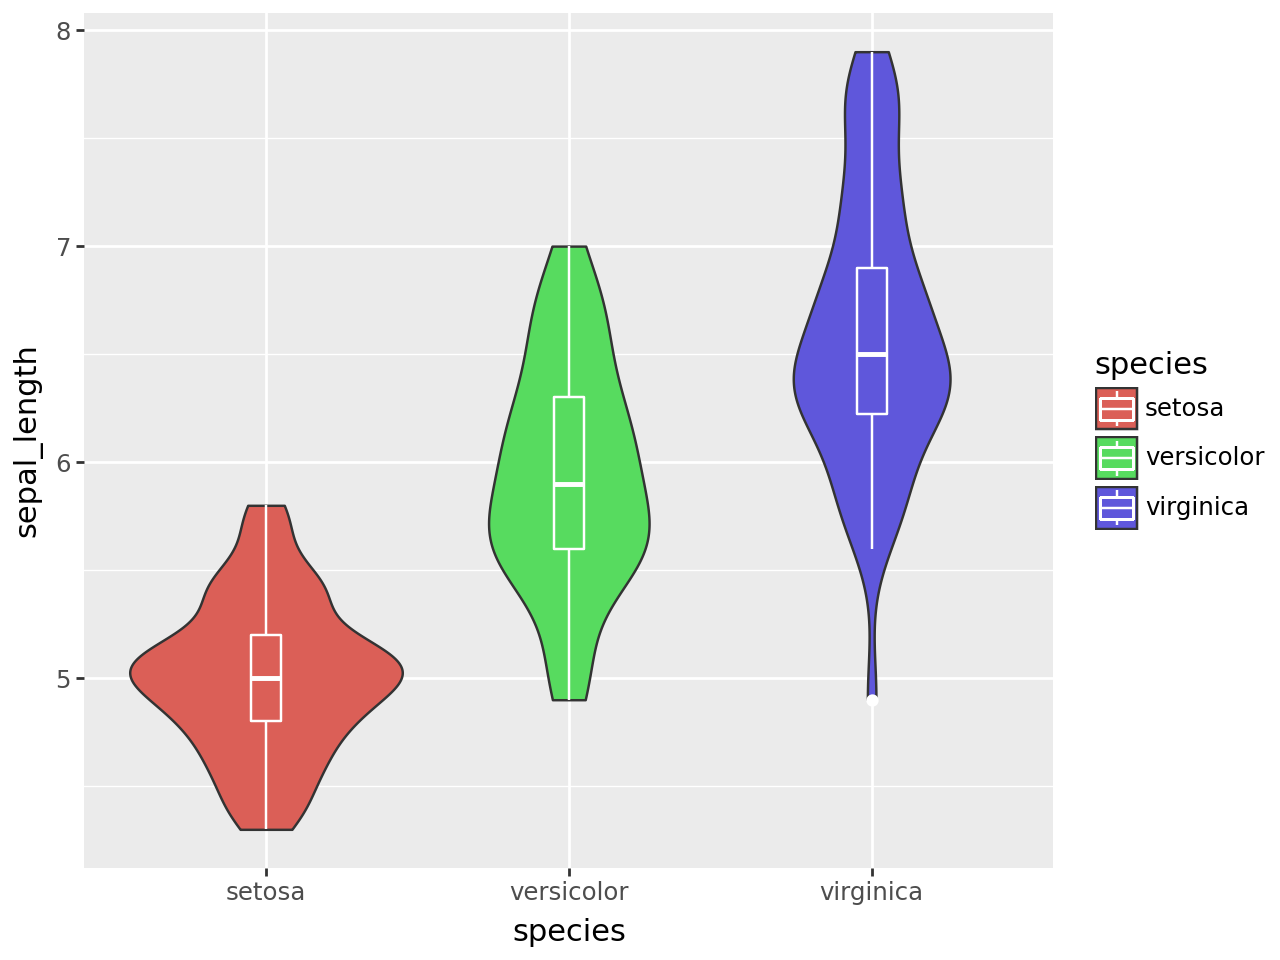

In [12]:
# Create a violinplot + boxplot together
graph3=(ggplot(sepal_length) + aes(x="species", y="sepal_length", fill="species")) + geom_violin() + geom_boxplot(width=0.1, color="white")
print(graph3)

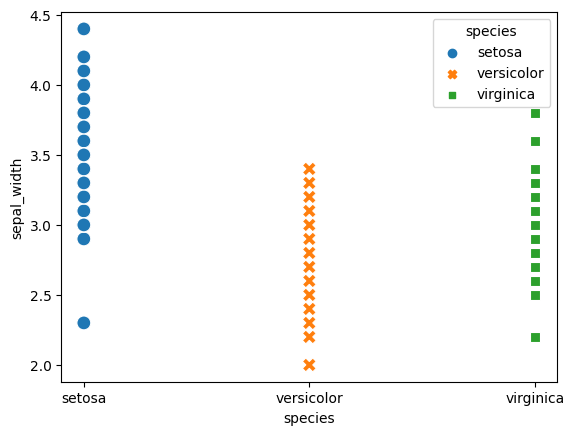

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot by Groups
sns.scatterplot(x='species', 
                y='sepal_width', 
                hue='species', # different colors by group
                style='species', # different shapes by group
                s=100, # marker size
                data=df)
plt.show()

In [40]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [41]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


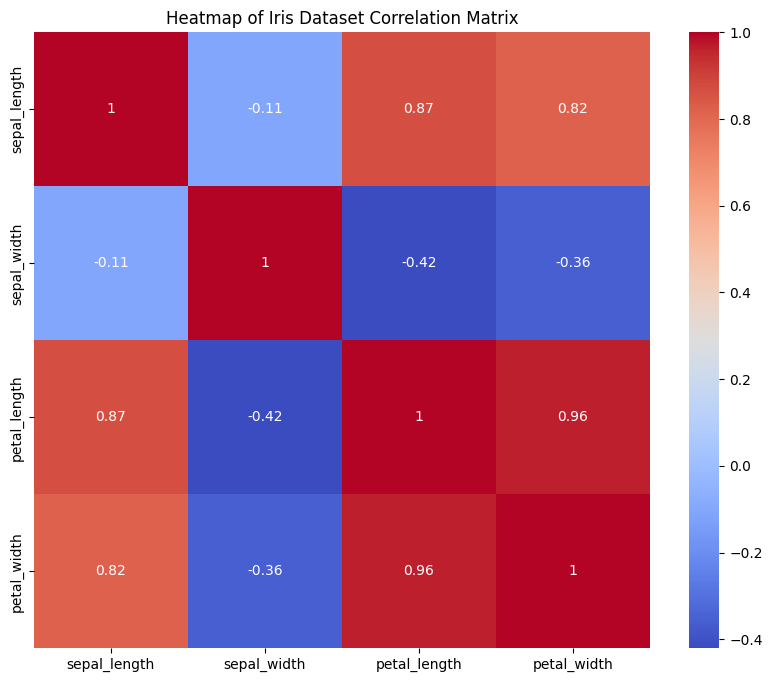

In [46]:
# Drop the 'species' column for the correlation matrix, as it's a categorical variable
numeric_df = df.drop('species', axis=1)

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Iris Dataset Correlation Matrix')
plt.show()

In [13]:
mean_sl=sepal_length.groupby(["species"])["sepal_length"].mean()
#hg2.groupby(["Chr_type"])["Gene_density_per_megabase"].mean()
print(mean_sl)
print(type(mean_sl))

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64
<class 'pandas.core.series.Series'>


In [14]:
print(type(mean_sl))
means=mean_sl.to_list()
print(means)

<class 'pandas.core.series.Series'>
[5.006, 5.936, 6.587999999999999]


In [16]:
std_sl=sepal_length.groupby(["species"])["sepal_length"].std()
std_sl
stds_sl=std_sl.to_list()
print(stds_sl)

[0.3524896872134513, 0.5161711470638635, 0.635879593274432]


In [17]:
data={
      "species":["setosa","versicolor","virginica"],
      "mean":means,"sd":stds_sl
}
data
     

{'species': ['setosa', 'versicolor', 'virginica'],
 'mean': [5.006, 5.936, 6.587999999999999],
 'sd': [0.3524896872134513, 0.5161711470638635, 0.635879593274432]}

In [18]:
data1=pd.DataFrame(data)
data1

,species,mean,sd
0,setosa,5.006,0.352490
1,versicolor,5.936,0.516171
2,virginica,6.588,0.635880


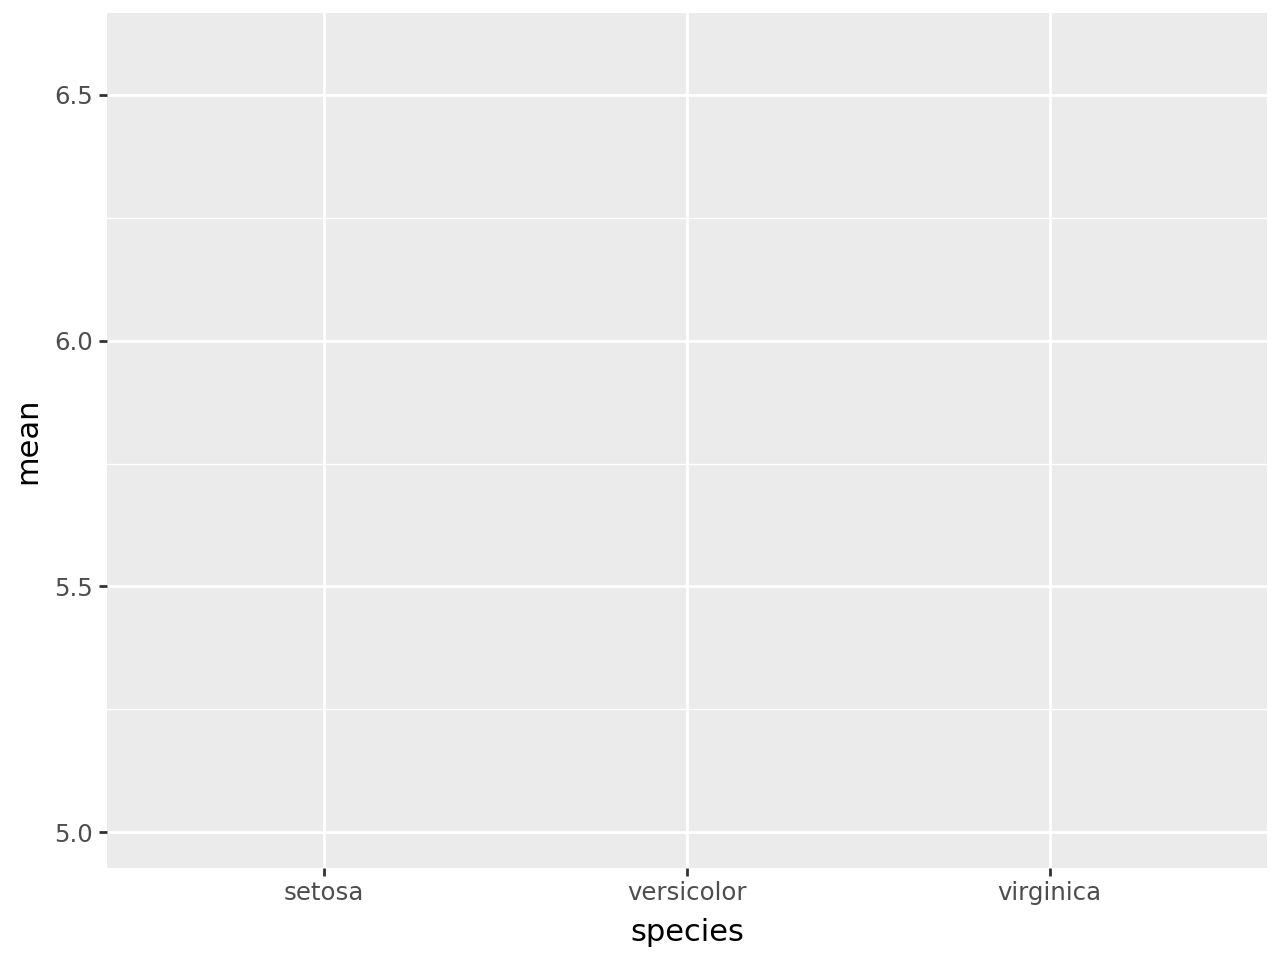

In [19]:

graph4=(ggplot(data1) + aes(x="species", y="mean"))
graph4

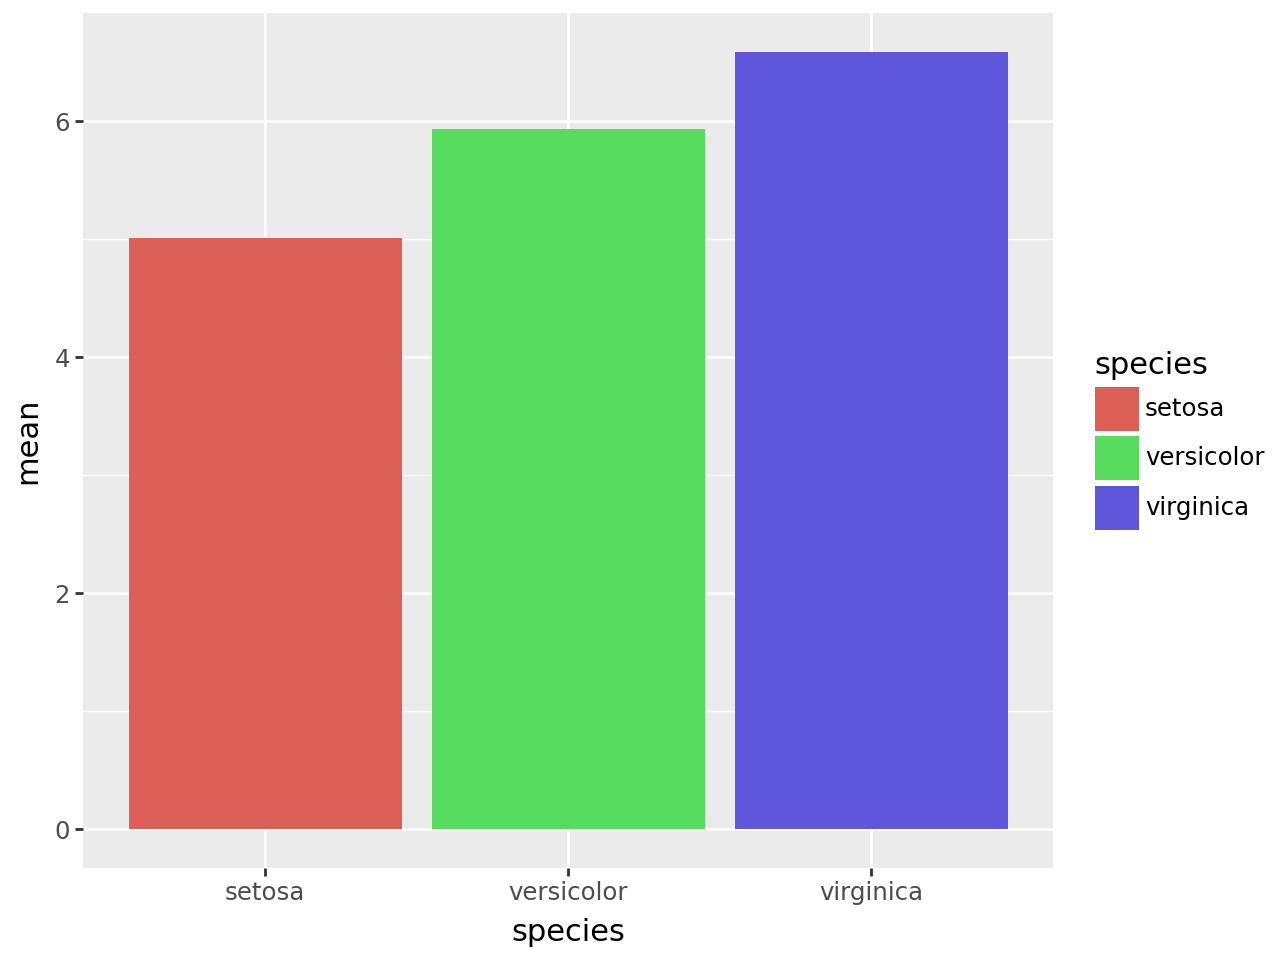

In [20]:
graph5=graph4 + geom_col() + aes(fill="species")
graph5

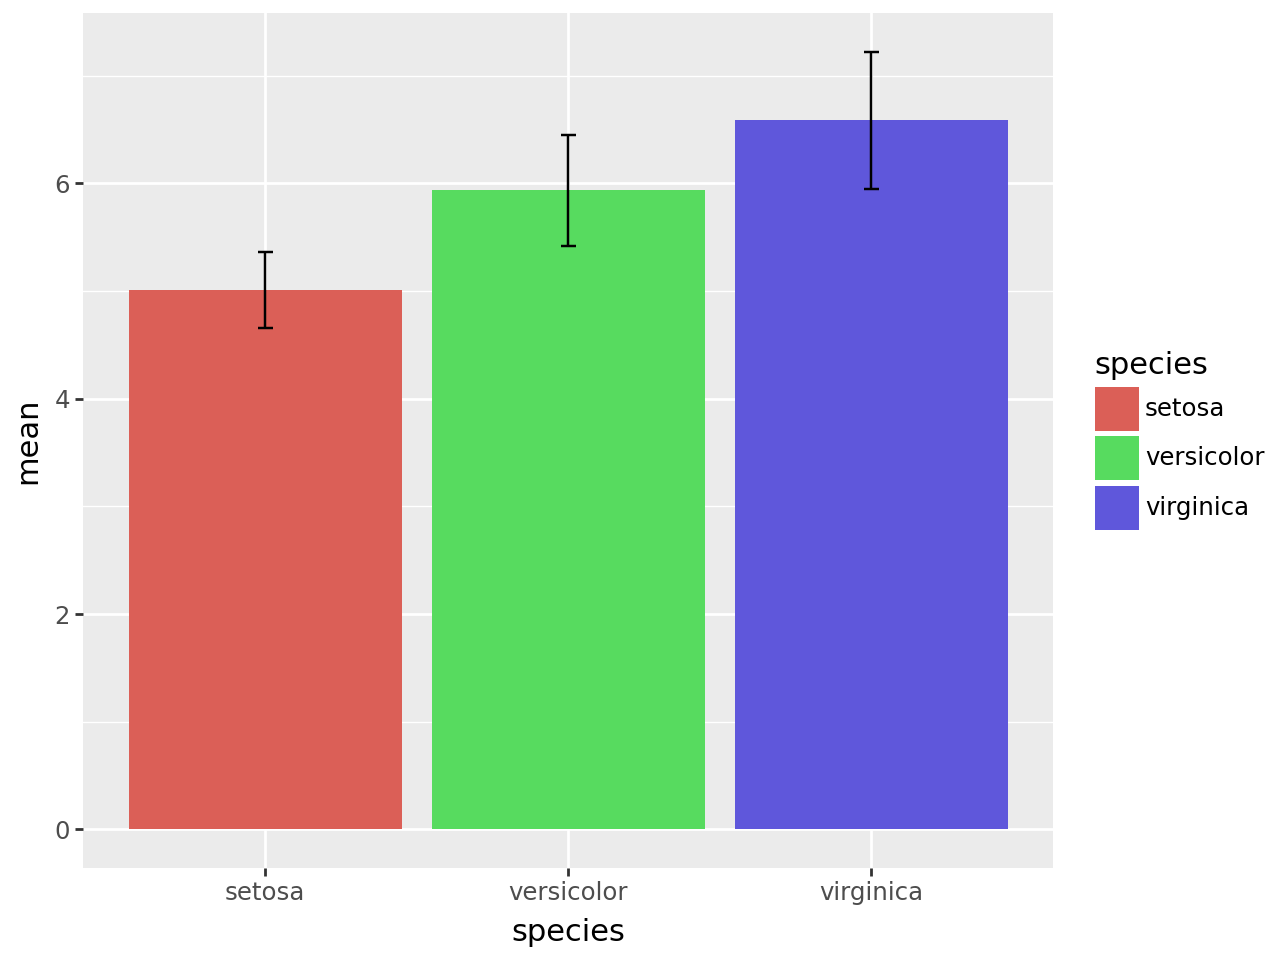

In [22]:
# adding eerrorbar
graph6=graph5 + geom_errorbar(aes(x="species",ymin=data1["mean"] - data1["sd"], ymax=data1["mean"] + data1["sd"], width=0.05))
graph6

In [34]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [30]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/o

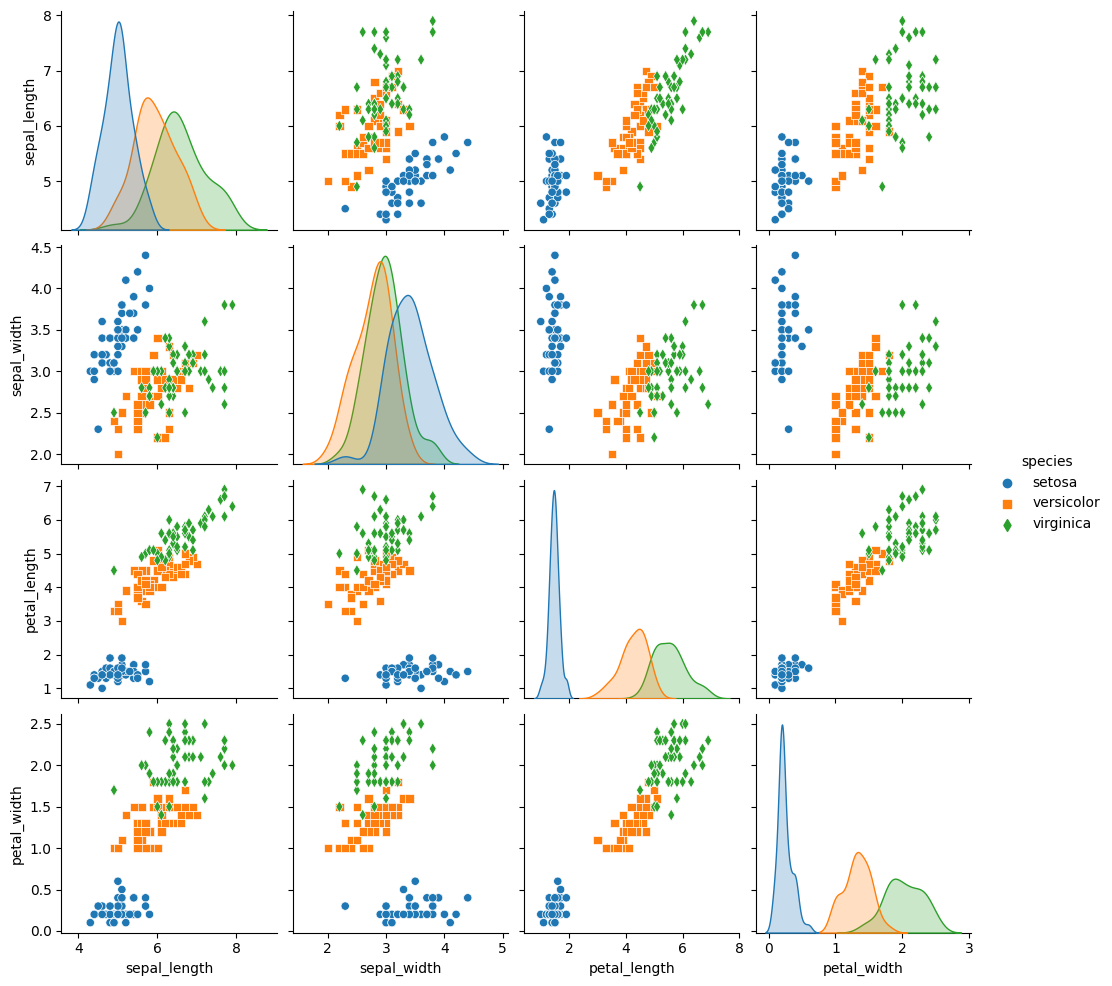

In [35]:
sns.pairplot(df,markers=['o','s','d'],hue='species')
plt.show()

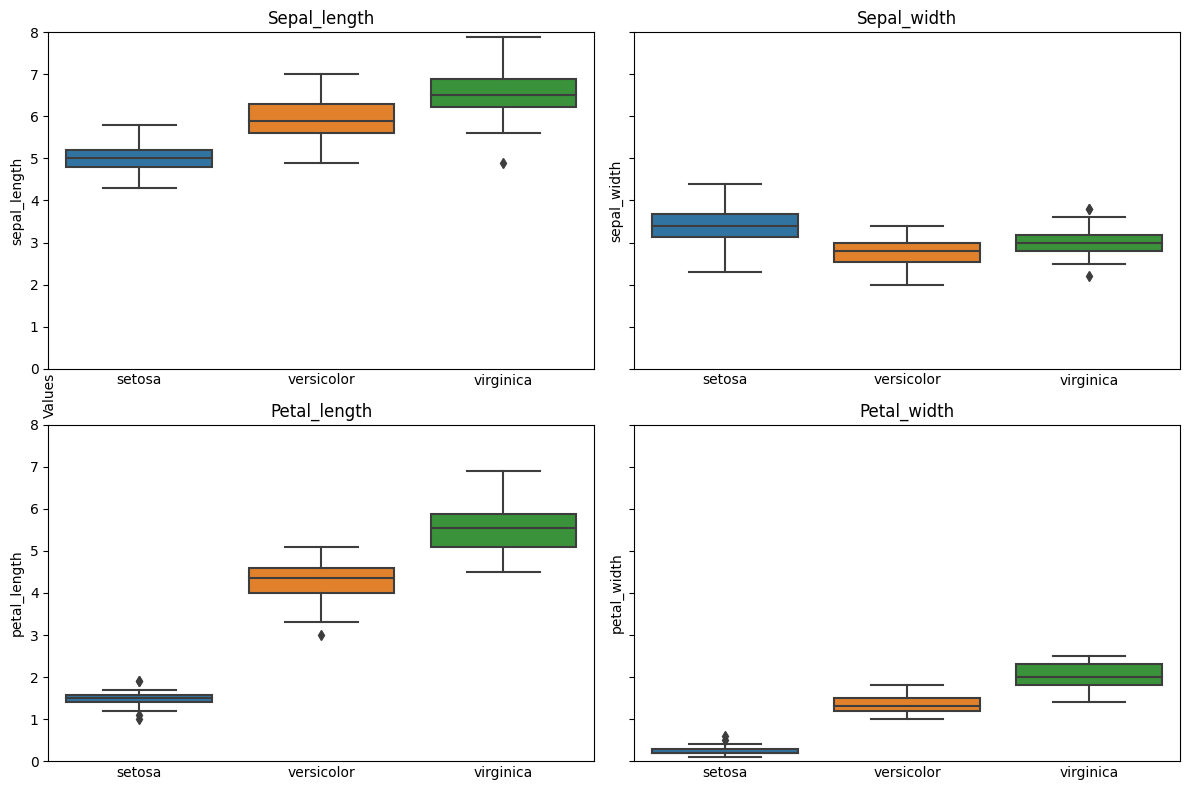

In [47]:
# Set the layout for the subplots in a 2x2 grid (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each feature (column) and create a boxplot for each species
features = df.drop('species', axis=1)
for i, feature in enumerate(features):
    sns.boxplot(x='species', y=feature, data=df, ax=axes[i])
    axes[i].set_title(feature.capitalize())  # Set the title for each subplot
    axes[i].set_ylim(0, 8)  # Set the y-axis limits
    axes[i].tick_params(axis='x', which='both', length=0)  # Remove x-axis ticks
    axes[i].set_xlabel('')  # Remove x-axis label for better spacing

# Remove any unused subplots if there are fewer than 4 features
for ax in axes[len(features):]:
    ax.remove()

# Add a common y-axis label and adjust spacing
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')
plt.tight_layout()

# Display the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/o

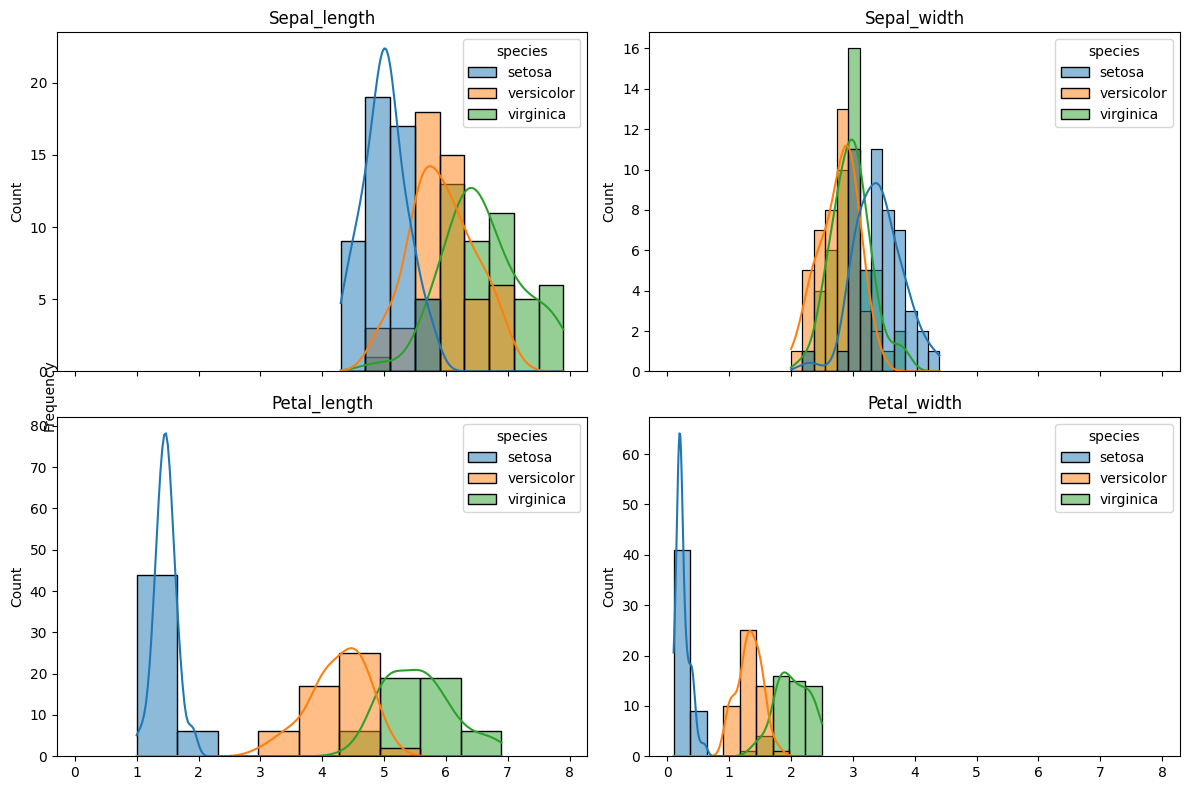

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='species', ax=axes[i], kde=True)
    axes[i].set_title(feature.capitalize())  # Set the title for each subplot
    axes[i].set_xlabel('')  # Remove x-axis label for better spacing

# Add a common y-axis label and adjust spacing
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
plt.tight_layout()

# Display the plot
plt.show()

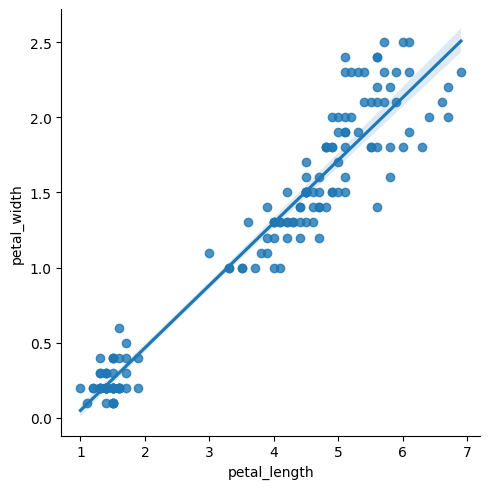

In [50]:
sns.lmplot( x = "petal_length" ,y="petal_width",data=df)
